In [1]:
from bisection import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tck

# Bisection Method

This notebook serves as a tutorial for the function ```bisection(f, x0)```. This performs the bisection method to find the zero of a function $f(x)$ where both the input and output are scalars. 

## Example 1

As a basic example, we have a pendulum with a mass m and length L connected to a torsional spring with constant k. This produces the simple steady-state torque balance:

```math
\tau = mgL \sin \theta + k\theta = 0
```

This will be compared to Newton's method by changing the tolerance to match

Converged after 26 iterations
0.008467480540275574


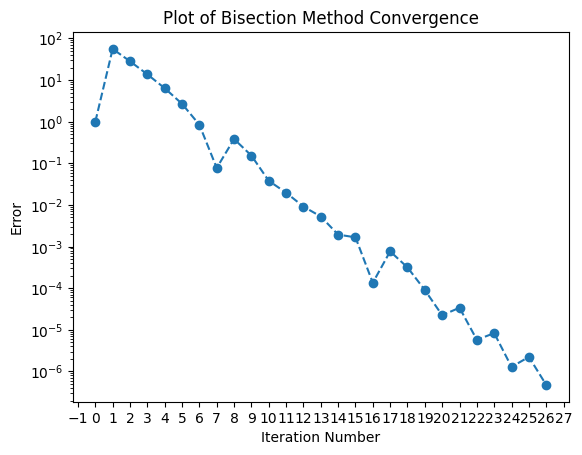

In [15]:
m = 5
g = 9.81
L = 2
k = 20
tau0 = 1

def T(theta):
    return tau0 - m*g*L*np.sin(theta) - k*theta

m, M = bisection(T, -1, 1, tol=1e-6)
print(m[-1])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.abs(M), '--o')
ax.set_yscale('log')
ax.xaxis.set_major_locator(tck.MultipleLocator())
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Error')
ax.set_title('Plot of Bisection Method Convergence')
plt.show()

## Example 2

This is the in-class example of two horizontal equivalent springs of constant k and rest length l being perturbed by a vertical force P. The force balance is characterized by a displacement w from the center:

```math
\sum F_y = 2kw \frac{\sqrt{l^2 + w^2} - l}{\sqrt{l^2 + w^2}} - P = 0
```

Converged after 9 iterations
0.697265625


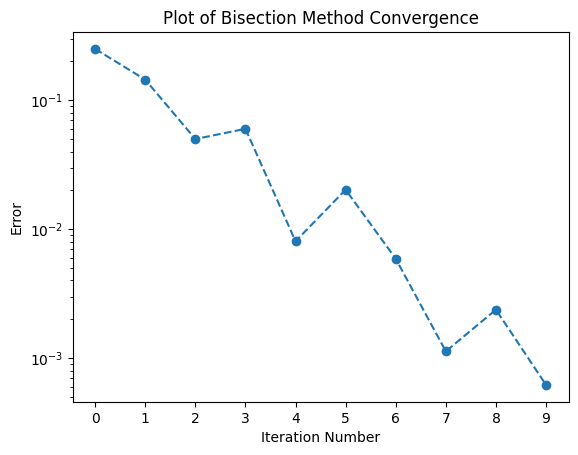

In [10]:
k = 1
l = 1
P = 0.25

def Fy(w):
    dl = np.sqrt(l**2 + w**2)
    return 2*k*w*(dl - l)/(dl) - P

m, M = bisection(Fy, -1, 1)
print(m[-1])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.abs(M), '--o')
ax.set_yscale('log')
ax.xaxis.set_major_locator(tck.MultipleLocator())
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Error')
ax.set_title('Plot of Bisection Method Convergence')
plt.show()

## Example 3

The next example shows a function that has multiple zeros along an interval:

```math
f(x) = x^5 - x^4 - 2x^3 - x^2 + x
```

Converged after 8 iterations
-0.740234375


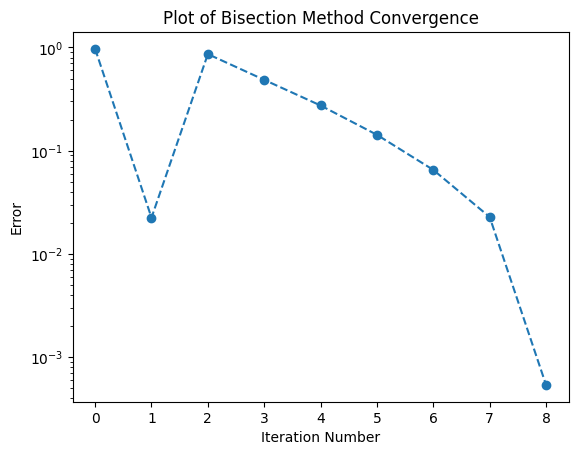

In [14]:
# Test of a window w/ multiple zeros
a = -2
b = 3
def f(x):
    return x**5 - x**4 - 2*x**3 - x**2 + x + 1

m, M = bisection(f, a, b)
print(m[-1])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.abs(M), '--o')
ax.set_yscale('log')
ax.xaxis.set_major_locator(tck.MultipleLocator())
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Error')
ax.set_title('Plot of Bisection Method Convergence')
plt.show()

## Example 4

This method can handle functions without well-defined derivatives and potentially find a zero. An example of one such function is:

```math
f(x) = \cos(x) + \text{round}(x)
```

Newton's method cannot reasonably deal with this function because its derivative is ill-defined at certain points.

Converged after 9 iterations
2.0947265625


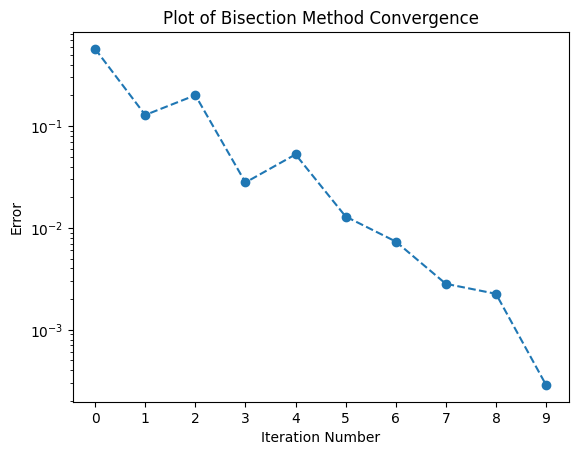

In [23]:
a = 0
b = 3
def f(x):
    return np.cos(x) + 1/4*round(x)

m, M = bisection(f, a, b)
print(m[-1])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.abs(M), '--o')
ax.set_yscale('log')
ax.xaxis.set_major_locator(tck.MultipleLocator())
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Error')
ax.set_title('Plot of Bisection Method Convergence')
plt.show()

## Example 5

The final example is another function where one of the starting points is an extrema:

```math
f(x) = x^2 - 2x - 1
```

 Newton's method cannot deal with these types of points as they make the jacobian singular. 

Converged after 7 iterations
2.4140625


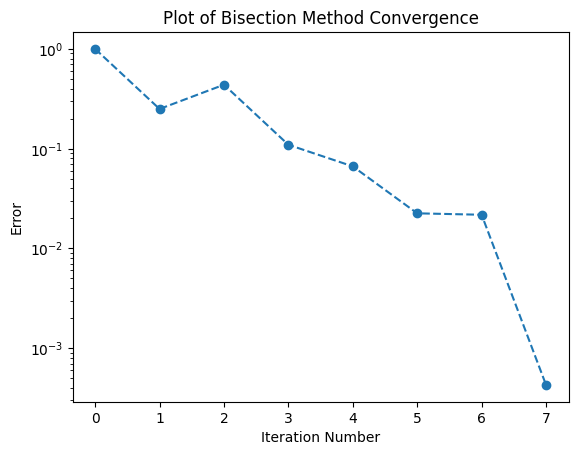

In [26]:
a = 1
b = 3
def f(x):
    return x**2 - 2*x - 1

m, M = bisection(f, a, b)
print(m[-1])
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.abs(M), '--o')
ax.set_yscale('log')
ax.xaxis.set_major_locator(tck.MultipleLocator())
ax.set_xlabel('Iteration Number')
ax.set_ylabel('Error')
ax.set_title('Plot of Bisection Method Convergence')
plt.show()
